# Memprediksi Pergerakan Harga BTC dengan algoritma K-Means Clustering 

Program ini bertujuan untuk mengelompokkan harga Bitcoin berdasarkan pola perubahan harga harian menggunakan algoritma K-Means. Pengelompokan dilakukan untuk menganalisis tren seperti kenaikan, penurunan, atau stabilitas harga (sideways).

In [3]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
# load data
file_path = 'Dataset-terbaru.csv'  
data = pd.read_csv(file_path)

In [9]:
# preview data
print("Data Head:")
print(data.head())

Data Head:
      Tanggal       Terakhir      Pembukaan      Tertinggi       Terendah  \
0  11/12/2024  1.555.160.960  1.545.462.016  1.558.300.032  1.531.399.040   
1  10/12/2024  1.545.462.016  1.558.404.992  1.564.996.992  1.510.004.992   
2  09/12/2024  1.558.404.992  1.598.880.000  1.599.000.064  1.524.999.936   
3  08/12/2024  1.598.880.000  1.576.859.008  1.599.000.064  1.570.001.024   
4  07/12/2024  1.576.859.008  1.577.532.032  1.589.998.976  1.566.733.056   

  Vol. Perubahan%  
0  NaN      0,63%  
1  NaN     -0,83%  
2  NaN     -2,53%  
3  NaN      1,40%  
4  NaN     -0,04%  


In [11]:
# debugging: Cek nama kolom setelah pemrosesan
print("Column names after cleaning:")
print(data.columns)

Column names after cleaning:
Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')


## Pre-Pemrosesan Data

In [14]:
# data cleaning and preprocessing
data = data.dropna()  # Drop missing values

In [16]:
# convert date to datetime and sort by date
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data = data.sort_values('Tanggal')

In [18]:
# Remove thousand separators and convert to float
features = ['Pembukaan', 'Terakhir', 'Tertinggi', 'Terendah']
for col in features:
    data[col] = data[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [20]:
# Check again after cleaning
print("Column names after conversion to float:")
print(data.columns)

Column names after conversion to float:
Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')


## Normalisasi Data

In [24]:
# Normalize data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[features])

## K-Means Clustering

In [27]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

E:\KULIAH UDINUS\SEMESTER 5\Komputasi Quantum\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# Add cluster labels
data['Cluster_Label'] = data['Cluster'].map({
    0: 'Kenaikan',
    1: 'Penurunan',
    2: 'Sideways'
})

In [31]:
# Analisis statistik deskriptif per cluster
cluster_stats = data.groupby('Cluster_Label')[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']].describe()
print("Statistik Deskriptif Tiap Cluster:")
print(cluster_stats)

Statistik Deskriptif Tiap Cluster:
              Terakhir                                                        \
                 count          mean           std          min          25%   
Cluster_Label                                                                  
Kenaikan           4.0  8.803235e+08  8.962758e+06  869528000.0  877069232.0   
Penurunan          3.0  8.424903e+08  5.511260e+06  838702976.0  839328992.0   
Sideways           4.0  9.037650e+08  1.217913e+07  894382976.0  897850976.0   

                                                     Pembukaan                \
                       50%          75%          max     count          mean   
Cluster_Label                                                                  
Kenaikan       880159488.0  883413744.0  891446976.0       4.0  8.803270e+08   
Penurunan      839955008.0  844384000.0  848812992.0       3.0  8.489510e+08   
Sideways       899508480.0  905422496.0  921660032.0       4.0  9.074605e+08   

   

## Visualisasi K-Means Clustering

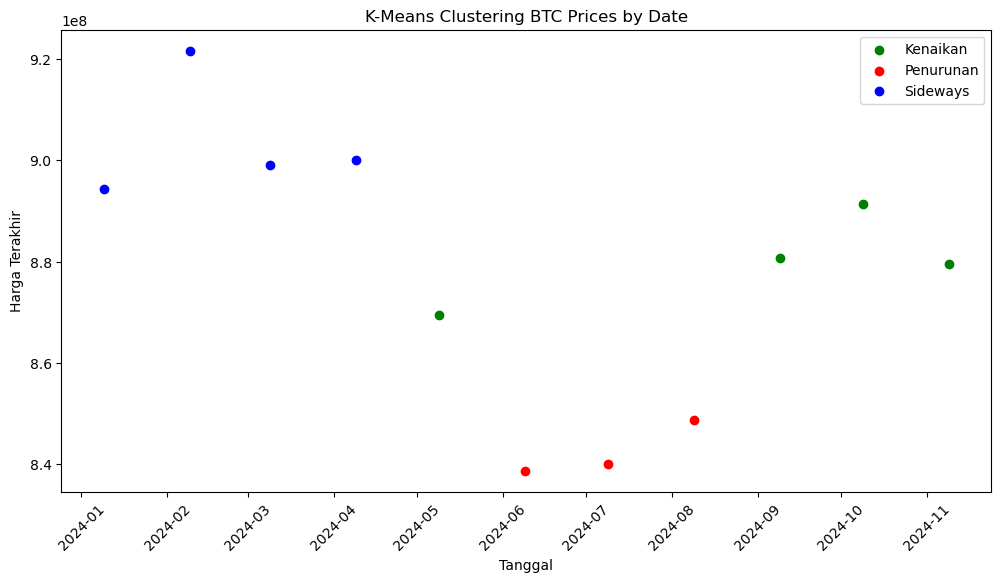

In [34]:
# visualisasi: Scatterplot berdasarkan tanggal
plt.figure(figsize=(12, 6))
for cluster, color in zip(['Kenaikan', 'Penurunan', 'Sideways'], ['green', 'red', 'blue']):
    cluster_data = data[data['Cluster_Label'] == cluster]
    plt.scatter(cluster_data['Tanggal'], cluster_data['Terakhir'], label=cluster, color=color)

plt.title('K-Means Clustering BTC Prices by Date')
plt.xlabel('Tanggal')
plt.ylabel('Harga Terakhir')
plt.xticks(rotation=45)
plt.legend()
plt.show()

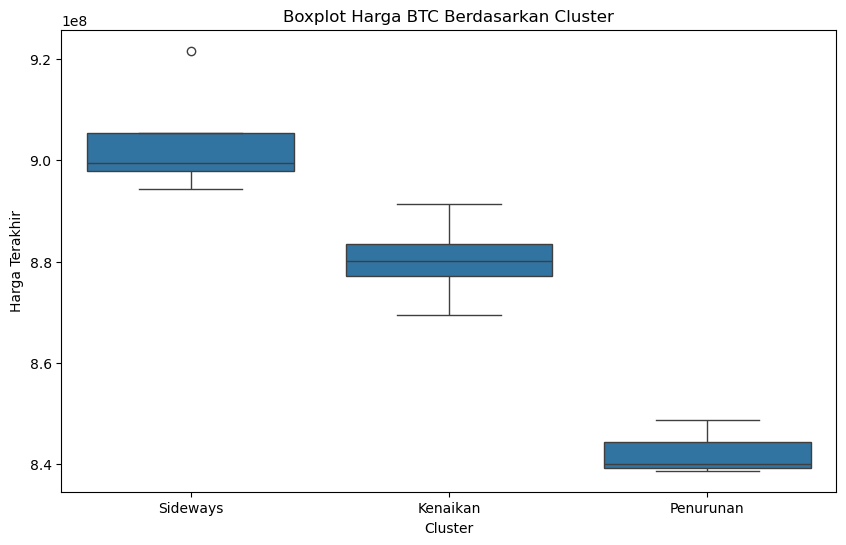

In [36]:
# visualisasi: Boxplot distribusi harga tiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Label', y='Terakhir', data=data)
plt.title('Boxplot Harga BTC Berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Harga Terakhir')
plt.show()

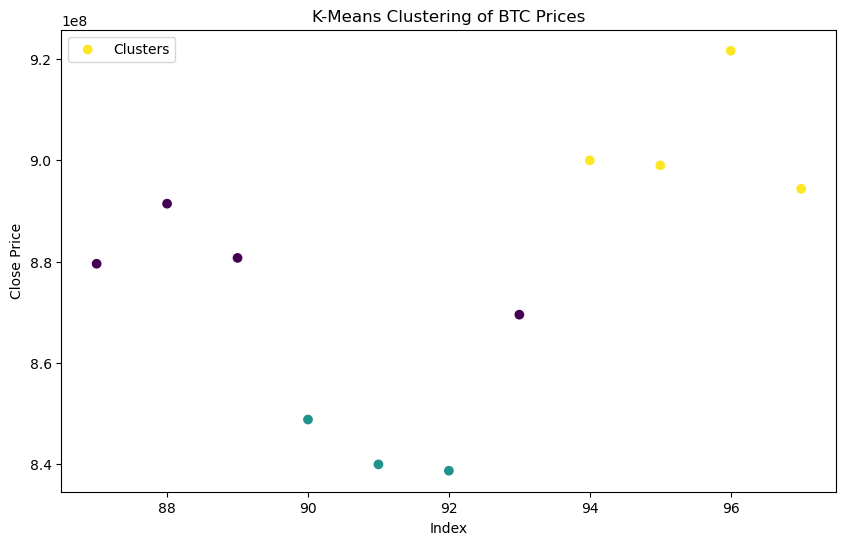

In [38]:
# visualisasi: Scatterplot berdasarkan indeks
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Terakhir'], c=data['Cluster'], cmap='viridis', label='Clusters')
plt.title('K-Means Clustering of BTC Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## visualisasi Grafik per-bulan

In [44]:
# grupkan data per bulan
data['Month'] = data['Tanggal'].dt.to_period('M')
monthly_avg = data.groupby(['Month', 'Cluster_Label'])['Terakhir'].mean().reset_index()

# pivot data untuk visualisasi
monthly_pivot = monthly_avg.pivot(index='Month', columns='Cluster_Label', values='Terakhir')

<Figure size 1400x800 with 0 Axes>

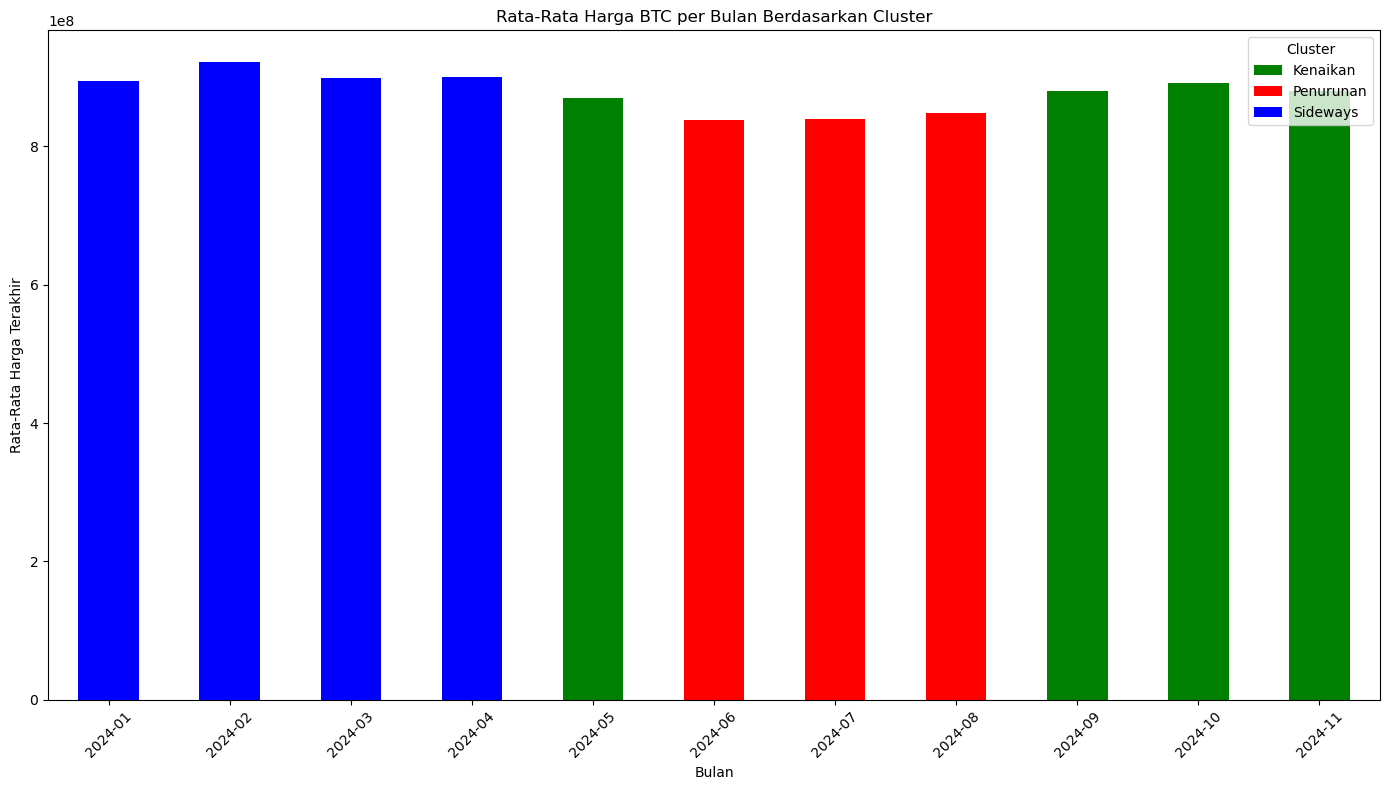

In [48]:
# plot grafik per bulan
plt.figure(figsize=(14, 8))
monthly_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=['green', 'red', 'blue'])
plt.title('Rata-Rata Harga BTC per Bulan Berdasarkan Cluster')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Harga Terakhir')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

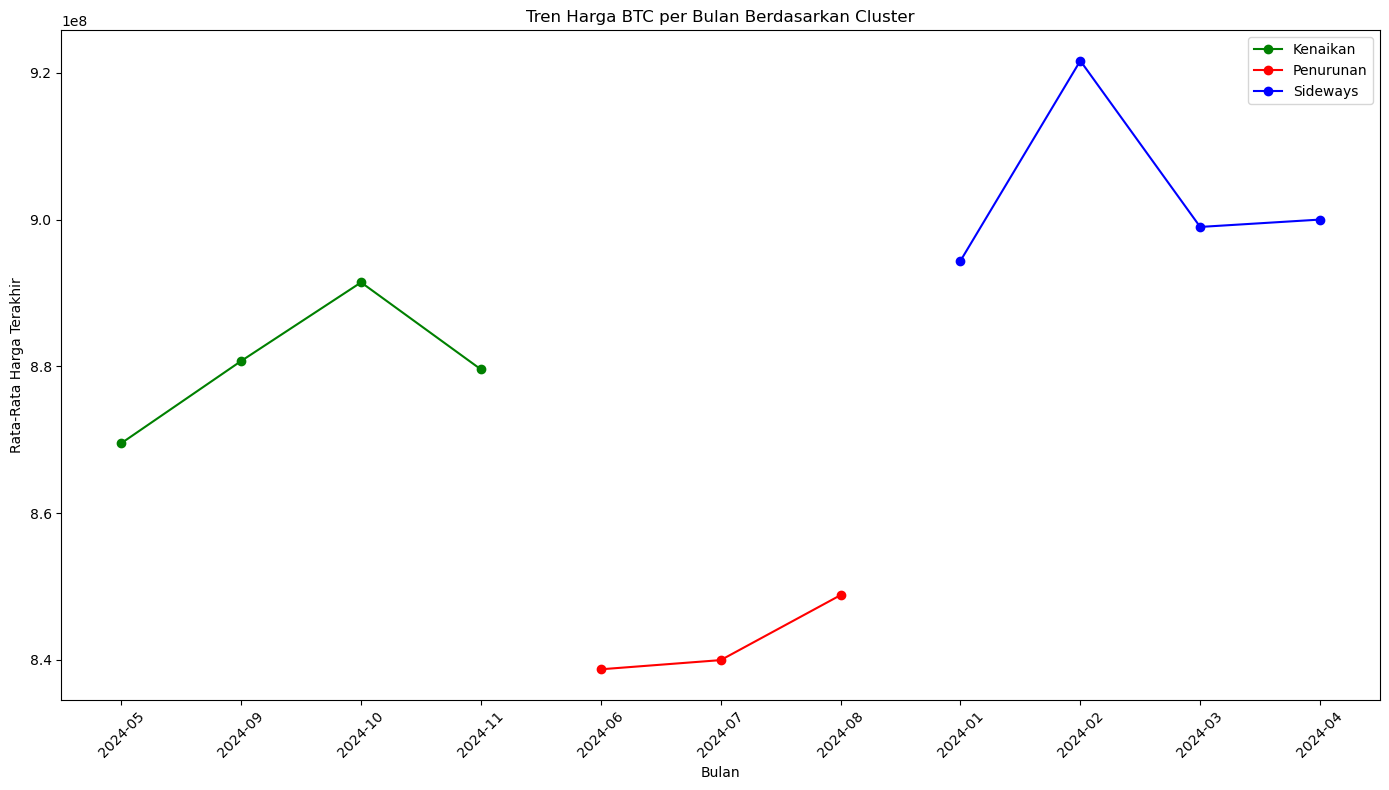

In [52]:
# alternatif: Garis untuk melihat tren per bulan
plt.figure(figsize=(14, 8))
for cluster, color in zip(['Kenaikan', 'Penurunan', 'Sideways'], ['green', 'red', 'blue']):
    cluster_monthly = monthly_avg[monthly_avg['Cluster_Label'] == cluster]
    plt.plot(cluster_monthly['Month'].astype(str), cluster_monthly['Terakhir'], label=cluster, color=color, marker='o')

plt.title('Tren Harga BTC per Bulan Berdasarkan Cluster')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Harga Terakhir')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Menyimpan Hasil Clustering

In [41]:
# Simpan data hasil clustering ke file
data.to_csv('BTC_Clustered_Analysis.csv', index=False)
print("Hasil clustering dan analisis tambahan telah disimpan ke BTC_Clustered_Analysis.csv")

Hasil clustering dan analisis tambahan telah disimpan ke BTC_Clustered_Analysis.csv
